## Prediction using Supervised ML

Predict the percentage of a student based on the number of study hours.

In [97]:
#importing the necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [98]:
#reading  the data
df = pd.read_csv("data.csv")
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Data Visualization

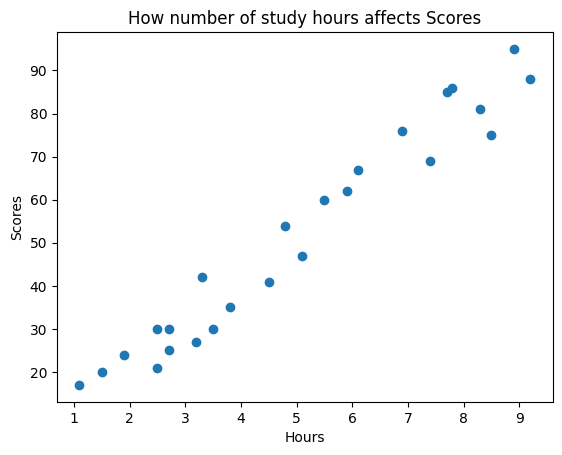

In [99]:
#Finding the relationship between Hours and Scores using pyplot
plt.scatter(df['Hours'], df['Scores'])
plt.title("How number of study hours affects Scores")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

#### From the above graph, it's very clear that there is a positive linear relationship between the variables -  Hours and Scores


In [100]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Preparing the data

In [101]:
#data preprocessing
X = df.iloc[:,:-1].values#independent variable array
y = df.iloc[:,1].values #dependent variable vector

In [102]:
#splitting the data
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#### Model Training

In [103]:
#fitting the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train) 

LinearRegression()

#### Making predictions

In [104]:
#displaying the test data
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [105]:
#predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [106]:
#comparing the actual vs predicted
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_compare

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


#### Visualizing the results

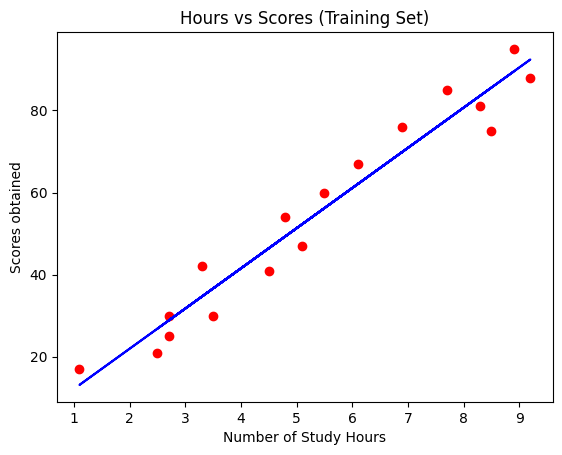

In [107]:
#plot for the Train data
plt.scatter(X_train, y_train, color = 'red') #plotting the observation line
plt.plot(X_train, regressor.predict(X_train), color = 'blue') #plotting the regression line
plt.title('Hours vs Scores (Training Set)')
plt.xlabel('Number of Study Hours')
plt.ylabel('Scores obtained')
plt.show()

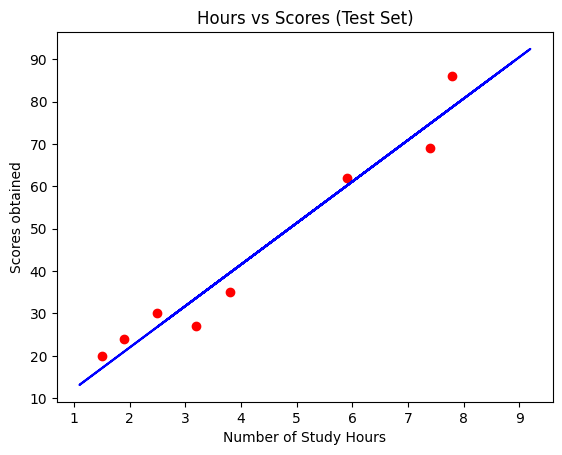

In [108]:
#plot for the Test data
plt.scatter(X_test, y_test, color = 'red') 
plt.plot(X_train, regressor.predict(X_train), color = 'blue') #plotting the regression line
plt.title('Hours vs Scores (Test Set)')
plt.xlabel('Number of Study Hours')
plt.ylabel('Scores obtained')
plt.show()

#### What will be the predicted score if the student studies for 9.25hrs/day?

In [111]:
hours = 9.25
hours_array = np.array([hours])
hours_2d = hours_array.reshape(1, -1)
predicted_score = regressor.predict(hours_2d)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(predicted_score[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


#### Evaluating the Model

In [114]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Mean Absolute Error:', 
      mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', 
      mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', 
      np.sqrt(mean_squared_error(y_test, y_pred))) 
print('R2:', 
      r2_score(y_test, y_pred)) 


Mean Absolute Error: 4.4197278080276545
Mean Squared Error: 22.96509721270044
Root Mean Squared Error: 4.792191274636316
R2: 0.9568211104435257
